In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

In [2]:
df = pd.read_csv("brfss_pp1.csv")
df

,CHD_OR_MI,SEX,AGE,HEALTH,PHYSICAL_HEALTH,MENTAL_HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,SKIN_CANCER,...,DIFFICULTY_WALKING,SMOKE,TABACCO_PRODUCTS,E_CIGARETTES,HEAVY_DRINKERS,HIV,FRUITS,VEGETABLES,FRIED_POTATOES,ETHNICITY
0,2,2,70,2,3,2,2,1,1,2,...,2,1,3,3,1,2,1,1,1,1
1,1,2,67,1,1,1,1,2,1,2,...,1,2,3,3,1,2,1,1,3,2
2,1,2,72,1,1,1,2,2,2,2,...,2,2,3,3,1,2,1,2,1,2
3,2,2,62,1,1,2,1,2,1,2,...,2,2,3,3,1,2,1,1,1,1
4,1,1,76,2,3,1,1,1,1,2,...,1,2,2,3,1,1,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406978,2,1,66,2,1,1,1,2,1,2,...,2,2,3,3,1,2,1,1,1,5
406979,2,2,30,1,1,3,1,2,2,2,...,2,1,3,3,1,1,1,1,1,2
406980,2,1,80,1,1,1,2,2,2,2,...,2,2,3,4,1,2,1,1,1,6
406981,2,1,67,1,1,1,1,2,2,2,...,2,2,3,4,1,1,1,1,3,2


In [3]:
df['CHD_OR_MI'] = df['CHD_OR_MI'].replace({2:0})

In [4]:
df['CHD_OR_MI'].describe()

count    406983.000000
mean          0.078969
std           0.269691
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: CHD_OR_MI, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406983 entries, 0 to 406982
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CHD_OR_MI            406983 non-null  int64  
 1   SEX                  406983 non-null  int64  
 2   AGE                  406983 non-null  int64  
 3   HEALTH               406983 non-null  int64  
 4   PHYSICAL_HEALTH      406983 non-null  int64  
 5   MENTAL_HEALTH        406983 non-null  int64  
 6   PHYSICAL_ACTIVITIES  406983 non-null  int64  
 7   BLOOD_PRESSURE       406983 non-null  int64  
 8   HIGH_CHOLESTEROL     406983 non-null  int64  
 9   SKIN_CANCER          406983 non-null  int64  
 10  CANCER               406983 non-null  int64  
 11  BRONCHITIS           406983 non-null  int64  
 12  DEPRESSIVE_DISORDER  406983 non-null  int64  
 13  KIDNEY_DISEASE       406983 non-null  int64  
 14  DIABETES             406983 non-null  int64  
 15  ARTHRITIS        

In [6]:
X = df.loc[:, df.columns!="CHD_OR_MI"]
y = df["CHD_OR_MI"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,stratify=y, random_state=1)

In [8]:
columns = X.columns.values

## Varianza

Text(0, 0.5, 'variables seleccionadas')

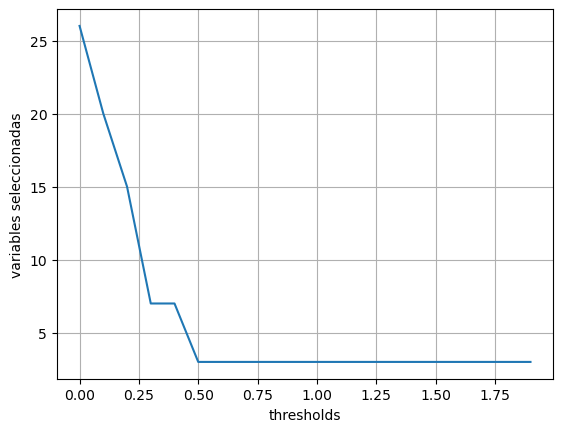

In [9]:
from sklearn.feature_selection import VarianceThreshold
thresholds=np.arange(0,2,0.1)
vars=[VarianceThreshold(threshold=th).fit_transform(X_train).shape[1]  for th in thresholds]
plt.plot(thresholds, vars)
plt.grid()
plt.xlabel("thresholds")
plt.ylabel("variables seleccionadas")

In [10]:
vt = VarianceThreshold(threshold=0.3)
X_train_tr = vt.fit_transform(X_train)
X_test_tr = vt.fit_transform(X_test)
print(f"Tamaño de X transformado {X_train_tr.shape}")
print(f"Tamaño de X test transformado {X_test_tr.shape}")

Tamaño de X transformado (305237, 8)
Tamaño de X test transformado (101746, 8)


In [11]:
vt.get_support()

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True, False, False, False, False,  True,  True])

In [12]:
vt.get_support()
concol = [v for column, v in enumerate(columns)
          if vt.get_support()[column]]

for features in concol:
    print(features)

AGE
PHYSICAL_HEALTH
MENTAL_HEALTH
DIABETES
BMI
E_CIGARETTES
FRIED_POTATOES
ETHNICITY


In [13]:
classifier = RandomForestClassifier(random_state=1, n_jobs=-1)
classifier.fit(X_train,y_train)
preds = classifier.predict(X_test) 
accuracy_score(y_test,preds)

0.9189452165195683

## Basado en importancia

In [36]:
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(max_depth=10, random_state=1, max_leaf_nodes=5, n_jobs=-1)

In [37]:
sfm = SelectFromModel(clf, threshold=0.02)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=10, max_leaf_nodes=5,
                                                 n_jobs=-1, random_state=1),
                threshold=0.02)

In [38]:
sfm.get_support()

array([False,  True,  True,  True, False, False,  True,  True, False,
       False,  True, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False])

In [39]:
selected_feat= X_train.columns[(sfm.get_support())].values
print(selected_feat)

['AGE' 'HEALTH' 'PHYSICAL_HEALTH' 'BLOOD_PRESSURE' 'HIGH_CHOLESTEROL'
 'BRONCHITIS' 'KIDNEY_DISEASE' 'DIABETES' 'DIFFICULTY_WALKING']


In [40]:
len(selected_feat)

9

In [41]:
sfm.threshold_

0.02

In [42]:
X_test_tr = sfm.transform(X_test)
X_train_tr = sfm.transform(X_train)

In [43]:
clf2 = RandomForestClassifier(random_state=1, n_jobs=-1)
clf2.fit(X_train_tr,y_train)
preds = clf2.predict(X_test_tr) 
accuracy_score(y_test,preds) 

0.9157706445462229

## PCA

In [9]:
from sklearn.decomposition import PCA

Tamaño de X_train: (406983, 26)
Scores de cada componente: [9.98855108e-01 1.12061274e-03 7.33053140e-06 2.72636723e-06
 1.79712667e-06 1.61747314e-06 1.20924926e-06 1.13767535e-06]
Componentes: [[-4.40129506e-05  4.55062039e-04  7.40811666e-05  1.09934757e-04
   4.77492664e-05  9.52284083e-05  1.90865986e-04 -1.00389504e-04
   1.53053445e-05 -2.39124101e-06 -1.91141656e-05 -6.02564961e-05
  -1.62080477e-05 -2.15114946e-04 -1.07905334e-04  9.99999814e-01
  -9.68981496e-05 -2.74740665e-05 -1.87857798e-05  8.15241693e-06
  -1.09025582e-05 -3.63125208e-05  6.99675035e-05  2.64306422e-05
  -6.45851127e-05  5.77110849e-05]
 [-1.86953756e-03 -9.99534322e-01 -2.65443386e-03 -2.28424314e-03
   9.28922236e-03 -2.84181078e-03 -1.05611297e-02  8.66485210e-03
   4.43525073e-03  3.87181120e-03  2.23137375e-03 -2.19396203e-03
   1.37556929e-03  7.36576104e-03  9.85800691e-03  4.59296465e-04
   4.83840117e-03  3.67576495e-03 -8.10569990e-04 -4.39017544e-03
   6.30096974e-04 -5.24754816e-03  2.0820118

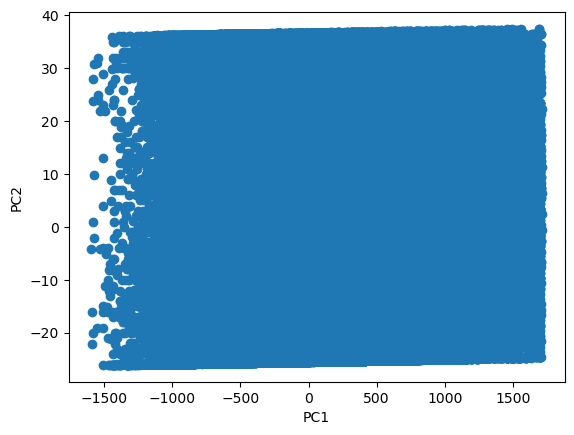

In [10]:
pca = PCA(n_components=8)
X_train_tr = pca.fit_transform(X_train)
print(f"Tamaño de X_train: {X.shape}")
print(f"Scores de cada componente: {pca.explained_variance_ratio_}")
print(f"Componentes: {pca.components_}")
plt.scatter(X_train_tr[:, 0], X_train_tr[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [21]:
X_test_tr = pca.transform(X_test)
classifier = RandomForestClassifier(random_state=1, n_jobs=-1)
classifier.fit(X_train_tr,y_train)
preds = classifier.predict(X_valid_tr) 
accuracy_score(y_test,preds) 

0.919220411613233

## Standardization

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
df.describe()

,CHD_OR_MI,SEX,AGE,HEALTH,PHYSICAL_HEALTH,MENTAL_HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,SKIN_CANCER,...,DIFFICULTY_WALKING,SMOKE,TABACCO_PRODUCTS,E_CIGARETTES,HEAVY_DRINKERS,HIV,FRUITS,VEGETABLES,FRIED_POTATOES,ETHNICITY
count,406983.000000,406983.000000,406983.000000,406983.000000,406983.000000,406983.000000,406983.000000,406983.000000,406983.000000,406983.000000,...,406983.000000,406983.000000,406983.000000,406983.000000,406983.000000,406983.000000,406983.000000,406983.000000,406983.000000,406983.000000
mean,0.078969,1.533487,54.560495,1.152746,1.422278,1.487428,1.233993,1.384429,1.660745,1.905890,...,1.859149,1.620935,2.952293,3.126683,1.055413,1.706236,1.337820,1.158741,1.615937,1.703199
std,0.269691,0.498878,17.578265,0.359743,0.678909,0.703621,0.423368,0.486461,0.473457,0.291981,...,0.347868,0.485155,0.284079,0.530068,0.228784,0.455486,0.472967,0.365435,0.703994,1.453916
min,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,2.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,2.000000,69.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
max,1.000000,2.000000,80.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,6.000000


In [24]:
scaler = StandardScaler()
scaler.fit(X_train_tr)
X_scaled = scaler.transform(X_train_tr)
X_scaled[0]

array([ 0.377235  ,  0.83809689,  2.1251676 , -1.03072914, -0.47423811,
       -0.46545975,  0.13028619, -0.40568964])

## Clasification

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, max_leaf_nodes = 15, max_depth=10, 
                             n_jobs=-1, class_weight = "balanced", random_state = 1)
rfc.fit(X_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=15,
                       n_estimators=500, n_jobs=-1, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.67      0.79     93711
           1       0.17      0.76      0.27      8035

    accuracy                           0.68    101746
   macro avg       0.57      0.72      0.53    101746
weighted avg       0.91      0.68      0.75    101746



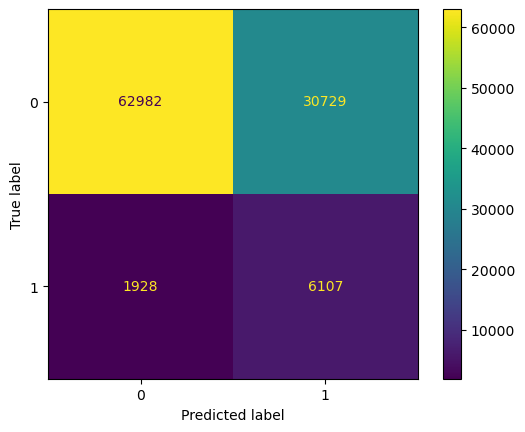

In [27]:
y_pred = rfc.predict(X_test_tr)
conf_mat=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_test,y_pred))

### XGBoost

In [28]:
from xgboost import XGBClassifier
cxgb = XGBClassifier(random_state=1, n_jobs = -1)
cxgb.fit(X_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     93711
           1       0.15      0.40      0.22      8035

    accuracy                           0.78    101746
   macro avg       0.55      0.61      0.55    101746
weighted avg       0.88      0.78      0.82    101746



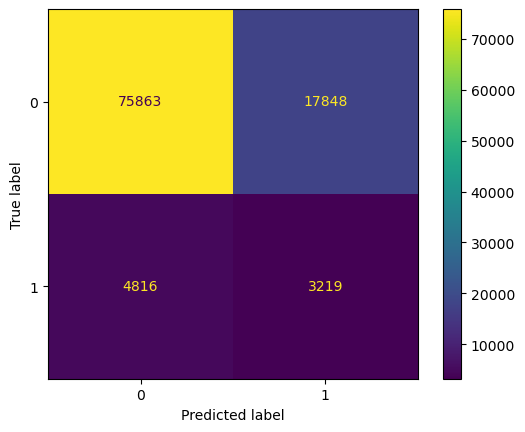

In [29]:
y_pred = cxgb.predict(X_test_tr)
conf_mat=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_test,y_pred))

### Light-GBM

In [30]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=1, n_jobs = -1)
lgbm.fit(X_scaled, y_train)

LGBMClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     93711
           1       0.25      0.04      0.06      8035

    accuracy                           0.92    101746
   macro avg       0.58      0.51      0.51    101746
weighted avg       0.87      0.92      0.89    101746



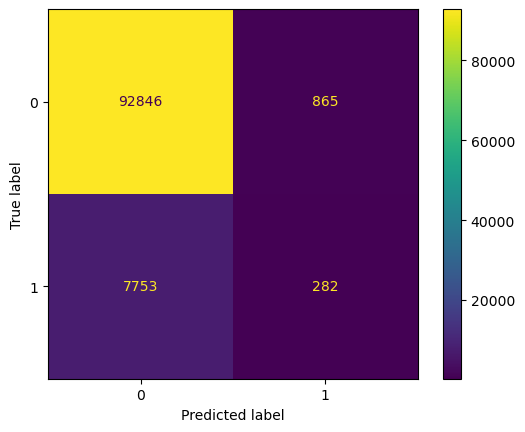

In [31]:
y_pred = lgbm.predict(X_test_tr)
conf_mat=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_test,y_pred))

## With Balance

In [32]:
from collections import Counter

def plot_frecuencia(X, y):
  colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y]
  kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
  fig = plt.Figure(figsize=(12,6))
  plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
  sns.despine()
  plt.show()
  pd.Series(Counter(y)).plot(kind='bar')
  plt.show()
  unique, count = np.unique(y, return_counts=True)
  print(np.asarray((unique, count)).T)

### Adasyn

D:\Anaconda\lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


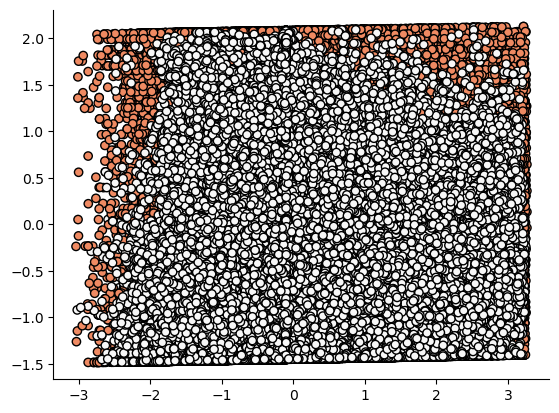

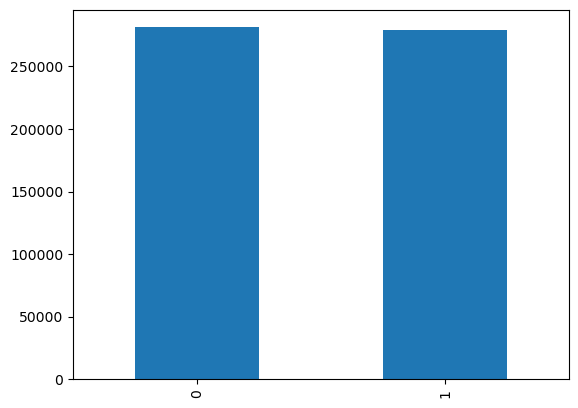

[[     0 281133]
 [     1 279235]]


In [33]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(n_jobs=-1)
X_train_r, y_train_r = ada.fit_resample(X_scaled, y_train)
plot_frecuencia(X_train_r, y_train_r)

In [34]:
X_train_r.shape

(560368, 8)

### RF

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 15, max_depth = 10, 
                             n_jobs=-1, random_state = 1)
rfc2.fit(X_train_r, y_train_r)

RandomForestClassifier(max_depth=10, max_leaf_nodes=15, n_estimators=500,
                       n_jobs=-1, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.66      0.78     93711
           1       0.16      0.76      0.26      8035

    accuracy                           0.67    101746
   macro avg       0.57      0.71      0.52    101746
weighted avg       0.91      0.67      0.74    101746



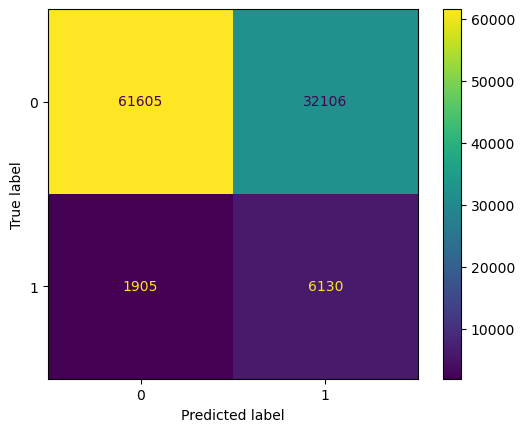

In [36]:
y_pred = rfc2.predict(X_test_tr)
conf_mat=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_test,y_pred))

### XGB

In [37]:
from xgboost import XGBClassifier
cxgb2 = XGBClassifier(random_state = 1, n_jobs = -1)
cxgb2.fit(X_train_r, y_train_r)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     93711
           1       0.18      0.05      0.08      8035

    accuracy                           0.91    101746
   macro avg       0.55      0.52      0.52    101746
weighted avg       0.86      0.91      0.88    101746



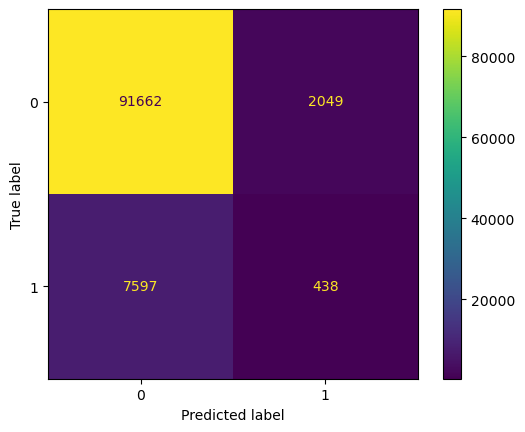

In [38]:
y_pred = cxgb2.predict(X_test_tr)
conf_mat=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_test,y_pred))

### LightGBM

In [39]:
from lightgbm import LGBMClassifier
lgbm2 = LGBMClassifier(random_state = 1, n_jobs = -1)
lgbm2.fit(X_train_r, y_train_r)

LGBMClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     93711
           1       0.17      0.69      0.27      8035

    accuracy                           0.71    101746
   macro avg       0.57      0.70      0.55    101746
weighted avg       0.90      0.71      0.78    101746



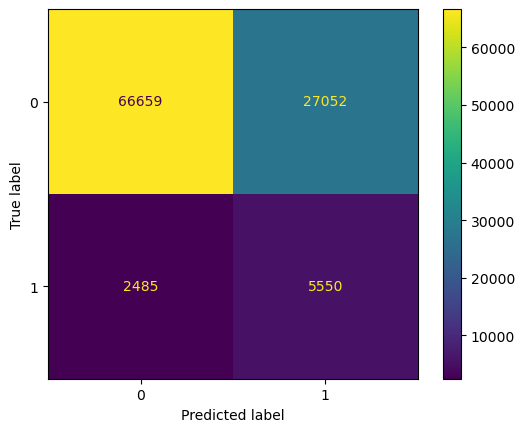

In [40]:
y_pred = lgbm2.predict(X_test_tr)
conf_mat=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_test,y_pred))